# **THE PERCEPTRON ALGORITHM**

The main goal of the **Perceptron algorithm** is to compute the unknown **parameters** $w_i$, $i=0,1,\ldots, l$ defining the decision hyperplane.

First, we assume that two classes $\omega_1, \omega_2$ are **linearly separable**. In other words, we assume that **there exists** a hyperplane, defined by
$$\textbf{w}^{*T} \textbf{x} =0$$
such that
\begin{eqnarray}
\textbf{w}^{*T}\textbf{x}  &>& 0 \quad \forall \textbf{x}\in \omega_1\\
\textbf{w}^{*T}\textbf{x}  &<& 0 \quad \forall \textbf{x}\in \omega_2\\
\end{eqnarray}

This formulation  also **covers the case of a hyperplane not crossing the origin**,
that is,
$$\textbf{w}^{*T} \textbf{x} +w_{0}^{*} =0$$
since this can be incorporated into the previous formulation by defining the extended $(l+1)$-dimensional vectors
\begin{eqnarray}
\textbf{x}^{'} &\equiv& (\textbf{x}^T, 1)^T\\
\textbf{w}^{'} &\equiv& (\textbf{w}^{*T}, w_0^{*})^T
\end{eqnarray}
Then
$$\textbf{w}^{*T} \textbf{x} + w_0^{*} = \textbf{w}^{'T} \textbf{x}^{'}$$

We will approach the problem as a typical **optimization task**.

Thus, we need to adopt
* An appropriate **cost function**
* An **algorithmic scheme** to optimize it.

## **The perceptron cost**

The **Perceptron cost** is defined as

$$J(\textbf{w}) = \sum_{x\in Y} (\delta_{x}\textbf{w}^T \textbf{x}) \tag{1}$$

where $Y$ is the subset of the training vectors, which are **misclassified** by the hyperplane defined by the weigh vector $\textbf{w}$.

The variable $\delta_x$ is chosen so that
$$\delta_x =\begin{cases} -1 & \text{if} \ \textbf{x}\in \omega_1\\
                          1 & \text{if} \ \textbf{x}\in \omega_2
\end{cases}$$

Therefore, the sum in (1) is **always nonnegative**, and it becomes zero when $Y$ becomes the empty set, that is, if there are not misclassified vectors $\textbf{x}$.

Indeed:
> If $x \in \omega_1$ and it is misclassified, then $\textbf{w}^T \textbf{x} <0$, and the product with $\delta_x=-1$ is positive.

> If $x \in \omega_2$ and it is misclassified, then $\textbf{w}^T \textbf{x} >0$, and the product with $\delta_x=1$ is positive.

When the cost function takes its minimum value, 0, a solution has been obtained, since all training feature vectors are correctly classified.

### **Alternative formulation**


Another way to understand  the **Perceptron** is as follows. Let $\{(\textbf{x}_i, y_i)\}_{i=1}^N$ the training set, where $\textbf{x}_i$ is the feature vector of the $i$-instance, and $y_i\in \{-1,1\}$ is its label: $y_i=1$ if instance $i$ belongs to $\omega_1$, and $-1$ if it belongs to $\omega_2$.

We consider the following functions

$$
f_{\textbf{x}}(\textbf{w})  = g_{\textbf{w}}(\textbf{x}) := \textbf{w}^T\textbf{x}
$$

Then, the **perceptron cost function** becomes

$$
J(\textbf{w}) = \sum_{i=1}^N \max \{0, \ -y_i \cdot f_{\textbf{x}_i}(\textbf{w}) \tag{2}\}$$



## **The gradient descent scheme**

Note, that the perceptron cost $J$ is **continuous** and **piecewise linear**.

Indeed, if we change the weight vector smoothly, the cost $J(\textbf{w})$ changes linearly until the point at which there is a change in the number of misclassified vectors.

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets

In [ ]:
# Training set
np.random.seed(0)
X1 = np.random.randn(5, 2) + np.array([2, 2])  # Class 1
X2 = np.random.randn(5, 2) + np.array([-2, -2])  # Class 2
X = np.vstack((X1, X2))
y = np.hstack((np.ones(5), -np.ones(5)))  # Labels: 1 y -1
lim = (-5, 5)
# Feature space w
w1_vals = np.linspace(lim[0], lim[1], 100)
w2_vals = np.linspace(lim[0], lim[1], 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Perceptron cost
def perceptron_cost(w):
    return sum(max(0, -y[i] * (w @ X[i])) for i in range(len(X)))

def draw(w1, w2):
  fig, ax = plt.subplots(1, 3, figsize=(20, 6))

  # Scatter plot of training data+
  w = np.array([w1, w2])
  normal_slope = -w[0] / w[1] if w[1] != 0 else np.inf
  x_vals = np.linspace(lim[0], lim[1], 100)
  y_vals = normal_slope * x_vals
  ax[0].plot(x_vals, y_vals, linestyle='--', color='black', label=f"$H$")
  ax[0].scatter(X1[:, 0], X1[:, 1], color='blue', label="Class 1")
  ax[0].scatter(X2[:, 0], X2[:, 1], color='red', label="Class 2")
  ax[0].quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='black', label=r'$\mathbf{w}$')
  ax[0].set_xlabel("$x_1$")
  ax[0].set_ylabel("$x_2$")
  ax[0].set_title("Training data")
  ax[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
  ax[0].axvline(0, color='black', linewidth=0.5, linestyle='--')
  ax[0].set_xlim(lim)
  ax[0].set_ylim(lim)
  ax[0].legend()
  ax[0].set_aspect('equal')
  ax[0].grid(linestyle='--')

  W1_flat = W1.flatten()
  W2_flat = W2.flatten()
  J = np.array([perceptron_cost(np.array(weights)) for weights in zip(W1_flat, W2_flat)]).reshape(W1.shape)
  J_w = perceptron_cost(w)

  # Contour plot in ax[1]
  contour = ax[1].contourf(W1, W2, J, cmap='viridis', alpha=0.9)
  ax[1].scatter(w[0], w[1], color='black', s=100, label=r"$\mathbf{w}$")
  ax[1].text(w[0], w[1], f"$J(w)={np.round(J_w, 3)}$",
             color="white", horizontalalignment="left", va="bottom")
  ax[1].set_xlabel("$w_1$")
  ax[1].set_ylabel("$w_2$")
  ax[1].set_title("Level sets of of cost function")
  ax[1].grid(linestyle='--')
  ax[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
  ax[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
  ax[1].set_aspect('equal')
  ax[1].set_xlim(lim)
  ax[1].set_ylim(lim)
  ax[1].legend()
  divider = make_axes_locatable(ax[1])
  cax = divider.append_axes("right", size="5%", pad=0.05)
  cbar = plt.colorbar(contour, cax=cax)
  cbar.set_label("Cost function value")

  # 3D Surface plot in ax[2]
  ax[2].spines["top"].set_visible(False)
  ax[2].spines["bottom"].set_visible(False)
  ax[2].spines["left"].set_visible(False)
  ax[2].spines["right"].set_visible(False)
  ax[2].set_xticks([])
  ax[2].set_yticks([])
  ax[2] = fig.add_axes(133, projection='3d')
  ax[2].plot_surface(W1, W2, J, cmap='viridis', alpha=0.75, linewidth=1)
  ax[2].set_xlabel("$w_1$")
  ax[2].set_ylabel("$w_2$")
  ax[2].set_zlabel("$J(w)$")
  ax[2].set_title("Cost function surface")
  ax[2].view_init(elev=30, azim=-45)
  ax[2].set_xlim(lim)
  ax[2].set_ylim(lim)
  ax[2].scatter(w[0], w[1], J_w, color='black', s=100, label=r"$\mathbf{w}$")
  ax[2].legend()
  ax[2].grid(linestyle='--')

  plt.show()

In [ ]:
# Interactive draw
w1_slider = widgets.FloatSlider(min=lim[0], max=lim[1], step=1, value=1, description='w1')
w2_slider = widgets.FloatSlider(min=lim[0], max=lim[1], step=1, value=1, description='w1')
widgets.interactive(draw, w1=w1_slider, w2=w2_slider)

interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0, step=1.0), FloatSlider(value…

To derive the algorithm for the **iterative minimization** of the cost function,
we will adopt an iterative scheme in the spirit of the **gradient descent method**, that is,

$$\textbf{w}(t+1) = \textbf{w}(t) - \alpha_t \frac{\partial J(\textbf{w})}{\partial \textbf{w}} |_{\textbf{w}=\textbf{w}(t)}$$

where $\textbf{w}(t)$ is the weight vector estimate at the $t$th iteration step and $\alpha_t$ is a sequence of positive real numbers.

However, this is not defined at the points of discontinuity.

From the definition in (1) and at the points where this is valid, we get

\begin{eqnarray}
\frac{\partial J(\textbf{w})}{\partial \textbf{w}} &=& \frac{\partial
}{\partial \textbf{w}}\sum_{x\in Y} (\delta_x\textbf{w}^T \textbf{x})\\
&=& \sum_{x\in Y} \delta_x\frac{\partial (\textbf{x}^T \textbf{w})
}{\partial \textbf{w}}\\
&=& \sum_{x\in Y} \delta_x\textbf{x}
\end{eqnarray}

Substituting, we obtain
$$\textbf{w}(t+1) = \textbf{w}(t) - \alpha_t  \sum_{x\in Y} \delta_x\textbf{x} \tag{3}$$

Note that this equation is defined at all points.

The equation (3) is known as the **perceptron algorithm** or the **perceptron rule**

# **The Algorithm**

1. The algorithm is initialized from an arbitrary weight vector $\textbf{w}(0)$, and the correction vector $\sum_{x\in Y} \delta_x \textbf{x}$ is calculate
using the misclassified features.

2. The weight vector is then corrected according to the preceding rule.

3. This is repeated until the algorithm converges to a solution, that is, all features are correctly classified.

Intuitively, in geometric terms, the algorithm updates the weight vector w, towards the vector resulting from the sum of all the misclassified vectors.

### **Pseudocode**

Perceptron Algorithm
---------------------
1. Choose $w(0)$ randomly
2. Choose $\alpha_0$
3. $t \leftarrow 0$
4. Repeat:

  a. $Y \leftarrow ∅$

  b. For $i = 1$ to $N$ do:

      * If $\delta_x \textbf{w}(t)^T \textbf{x}_i \geq 0$ then

          * $Y \leftarrow Y \cup \{x_i\}$

  c. $\textbf{w}(t + 1) \leftarrow \textbf{w}(t) + \alpha_t \sum_{x\in Y} \delta_x \textbf{x}$

  d. Update $\alpha_t$

  e. $t \leftarrow t + 1$

5. Until $Y=\emptyset$


### **Convergence**

It can be shown that the perceptron algorithm **converges** to a solution $\textbf{w}^{*}$ in a **finite number** of iterations steps, provided that the sequence $\alpha_t$ meets certain conditions (and the problem is **linearly separable**).

Particularly if the sequence $\alpha_t$ is chosen to satisfy the following two conditions, the algorithm converges in finite time:
\begin{eqnarray}
\lim_{t\rightarrow \infty} \sum_{k=0}^t \alpha_k &=& \infty \tag{4}\\
\lim_{t\rightarrow \infty} \sum_{k=0}^t \alpha_k^2 &<& \infty  \tag{5}\\
\end{eqnarray}

In other words, the corrections become increasingly small. What these conditions basically state is that $\alpha_t$ should vanish as $t\rightarrow \infty$ (eq. 4) but on the other hand, it should not go to zero very fast (eq. 5).

An example of a sequence satisfying both conditions is
$$\alpha_t = \frac{c}{t}$$
where $c$ is a contant.

Also, it is possible to show that the algorithm converges for constante
$\alpha_t = \alpha$, provided $\alpha$ is properly bounded.

In practice, the proper choice of the sequence $\alpha_t$ is vital for the convergence speed of the algorithm.


**Note**: The solution $\textbf{w}^{*}$ **is not unique**, because there are more than one hyperplanes separating two linearly separable classes

# **Variants of the Perpcetron Algorithm**

In the previous version of the perceptron algorithm all misclassified vectors are considered in the update. A variant is that the $N$ training vectors enter the algorithm cyclically, **one after the other**.

If the algorithm has not converged after the presentation of all the samples once, then the procedure keeps repeating until convergence is achieved; that is, when all training samples have been classified correctly.

Let $\textbf{w}(t)$ be the weight vector estimate and $\textbf{x}_t$ the
corresponding feature vector presented at the $t$th iteration step.

The algorithm is stated as follows:
\begin{eqnarray}
  \textbf{w}(t+1) &=& \textbf{w}(t) + \alpha \textbf{x}_t & \quad \text{if} \ \textbf{x}_t \in \omega_1 \ \& \ \textbf{w}^T(t)\textbf{x}_t \leq 0\\
  \textbf{w}(t+1) &=& \textbf{w}(t) - \alpha \textbf{x}_t & \quad \text{if} \ \textbf{x}_t \in \omega_2 \ \& \ \textbf{w}^T(t)\textbf{x}_t \geq 0\\
  \textbf{w}(t+1) &=& \textbf{w}(t) & \quad \text{otherwise}
\end{eqnarray}

In other words, if the current training sample is classified correctly, no action is taken. Otherwise, if the sample is misclassified, the weight vector is corrected by adding (subtracting) an amount proportional to $\textbf{x}_t$.

This variant of algorithm Perceptron belongs to a more general algorithmic family known as **reward and punishment schemes**.

> If the classification is correct, the reward is that no action is taken.

> If the current vector is misclassified, the punishment is the cost of correction.

It can be shown that this form of the perceptron algorithm also **converges** in a **finite number of iteration steps**.

# **The Perceptron as a Single-Layer Neural Network**

Once the perceptron algorithm **has converged** to a weight vector $\textbf{w}^{*}$ and a threshold $w_0^{*}$, our next goal is the **classification of an unknown feature vector** to either of the two classes.

Classification is achieved via the simple rule:
\begin{eqnarray}
\text{If} \qquad \textbf{w}^{*}\textbf{x} + w_0^{*} &>& 0  \qquad \textbf{x} \rightarrow \omega_1\\
\text{If} \qquad \textbf{w}^{*}\textbf{x} + w_0^{*} &<& 0  \qquad \textbf{x} \rightarrow \omega_2\\
\end{eqnarray}

This operation can be represented by a unit of a neural network. In this model, a linear combiner is followed by the activation function.

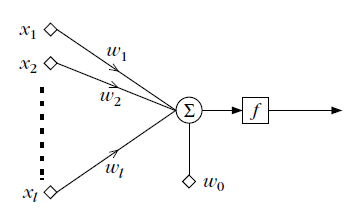

> The elements of the feature vector $x_1, x_2,\ldots, x_l$ are applied to the input nodes of the network.

> Then each one is multiplied by the corresponding weights $w_i$, $i=1,2,\ldots,l$. These are known as **synaptic weights**.

> The products are summed up together with the **threshold value** $w_0$.

> The result then goes through a nonlinear device, which implements the so-called **activation function**.
>> A common choice is a hard limiter; that is, $f(\cdot)$ is the step function
$$f(x) = \begin{cases}-1 & \ \text{if} \ x<0\\ 1 & \ \text{if} \ x>0 \end{cases}$$
>> The corresponding feature vector is classified in one of the classes depending on the sign of the output. Besides $+1$ and $-1$, other values
(class labels) for the hard limiter are also possible. Another popular choice is 1 and 0, and it is achieved by choosing the two levels of the step function appropriately.

This basic network is known as a **perceptron** or **neuron**.

Perceptrons are simple examples of the so-called **learning machines**, that is, structures whose **free parameters** are **updated by a learning algorithm**, such as the perceptron algorithm, in order to *'learn'* a specific task, based on a set of training data.

# **$M$-class task (Kesler's construction)**

To generalize to a task of $M$-classes we do the following:

- A linear discriminant function $\textbf{w}_i$, $i=1,2,\ldots,M$, is defined for each of the classes.

- A feature vector $\textbf{x}$, in the $(l+1)$-dimensional space to account for the threshold, is classified in class $\omega_i$ if
$$\textbf{w}_i^T \textbf{x} > \textbf{w}_j^T \textbf{x} , \qquad \forall j\neq i$$

- This condition leads to the so-called **Kesler's construction**

- For each of the training vectors from class $\omega_i$, $i=1,2,\ldots,M$, we  construct $M-1$ vectors
$$\textbf{x}_{ij} = [ \textbf{0}^T, \textbf{0}^T, \ldots, \textbf{x}^T, \ldots, -\textbf{x}^T, \ldots, \textbf{0}^T]^T $$
of dimension $(l+1)M$. That is, they are vectors that have  zeros everywhere except at the $i$th and $j$th blocks positions, where they have $\textbf{x}$ and $-\textbf{x}$, respectively, for $j\neq i$.

- We also construct the block vector
$$\textbf{w}=[\textbf{w}_1^T, \textbf{w}_2^T,\ldots,\textbf{w}_M^T]^T$$


- The task now is to design a linear classifier, in the extended $(l+1)M$-dimensional space, so that each of the $(M-1)N$ training vector lies in its positive side.

To verify the above, suppose that $\textbf{x}_i$ belongs to class $\omega_i$ and  $\textbf{w}^*$ satisfies $\textbf{w}^{*T}\textbf{x}_{ij} > 0, \forall j\neq i$.


So for each position $j$ different to $i$
\begin{eqnarray}
\textbf{w}^{*T}\textbf{x}_{ij} &>& 0\\
[\textbf{w}_1^T, \ldots, \textbf{w}_i^T, \ldots, \textbf{w}_j^T, \ldots, \textbf{w}_M] \left[\begin{matrix}\textbf{0}\\ \vdots \\ \textbf{x}_i \\ \vdots \\ -\textbf{x}_i \\ \vdots \\ \textbf{0} \end{matrix} \right] &>& 0 \\
\sum_{k=1,\\ k\neq i,j}^M \textbf{w}_k^{T}\textbf{0} + \textbf{w}_i^{T} \textbf{x}_i - \textbf{w}_j^{T} \textbf{x}_i &>& 0\\
\textbf{0} + \textbf{w}_i^{T} \textbf{x}_i - \textbf{w}_j^{T} \textbf{x}_i &>& 0\\
\textbf{w}_i^{T} \textbf{x}_i &>& \textbf{w}_j^{T} \textbf{x}_i
\end{eqnarray}